In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("tvmarketing.csv")

In [3]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
df.shape()

TypeError: 'tuple' object is not callable

In [7]:
df.shape

(200, 2)

In [8]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [9]:
import seaborn as sns

#to visualise in the notebook
%matplotlib inline

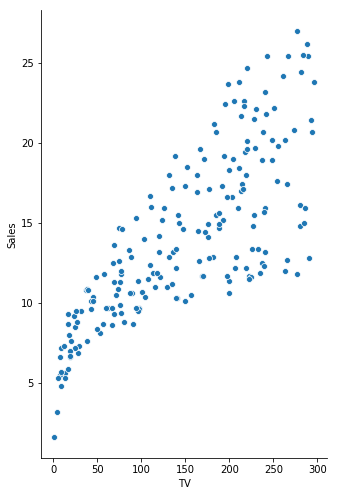

In [11]:
sns.pairplot(df,x_vars=['TV'],y_vars='Sales',height=7,aspect=0.7,kind='scatter')

In [12]:
X=df['TV'] #feature for tv value
Y=df['Sales'] # "    "  sales "

In [13]:
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [14]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Prediction goes here

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=100)

In [19]:
print(type(X_train))
print(type(X_test))
print(type(Y_train))
print(type(Y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [20]:
X_train=X_train[:,np.newaxis]
X_test=X_test[:,np.newaxis]


In [21]:
print(X_train.shape)
print(X_test.shape)

(140, 1)
(60, 1)


In [22]:
print(Y_train.shape)
print(Y_test.shape)

(140,)
(60,)


# Performing Linear regression

In [23]:
from sklearn.linear_model import LinearRegression

# creating object
lr=LinearRegression()

#fitting the model
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
print(lr.intercept_)
print(lr.coef_)

6.989665857411679
[0.04649736]


# Representing equation

General equation of line--->
y= m * x + c

According to our data the equation becomes---->
sales = coefficient * tv + intercept

i.e.

slaes = 0.0464 * tv + 6.9896

# Prediction

In [25]:
y_pred =lr.predict(X_test) #this is used for prediction purpose 

In [26]:
type(y_pred)

numpy.ndarray

# Computing RMSE and R^2 value

Comparing actual vs predicted data

Text(0, 0.5, 'Sales')

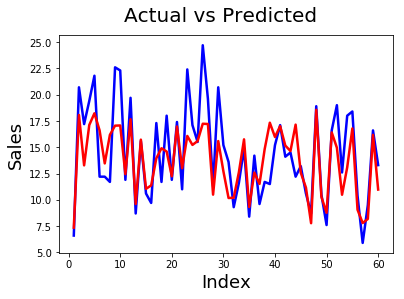

In [29]:
import matplotlib.pyplot as plt
c= [i for i in range(1,61,1)] # generating indexes
fig =plt.figure()
plt.plot(c, Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle("Actual vs Predicted", fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Sales',fontsize=18)

# Checking the quality of the model  by using residuals

---->>>> Residual is nothing but the difference between the actual value and the predicted value which gives the insight of the quality of the model

Text(0, 0.5, 'Y_test - y_pred')

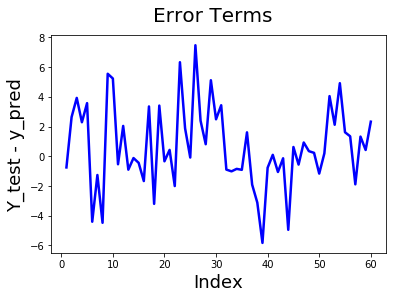

In [32]:
#this is used to print the residual
c= [i for i in range(1,61,1)] # generating indexes
fig =plt.figure()
plt.plot(c, Y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")

fig.suptitle("Error Terms", fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Y_test - y_pred',fontsize=18)

# Calculating mean square and R sqaure values

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test,y_pred)

In [34]:
r_squared =r2_score(Y_test,y_pred)

In [36]:
print("mean_squared_error--->", mse)
print("r_squared_value--->", r_squared)

mean_squared_error---> 7.97579853285485
r_squared_value---> 0.5942987267783302


----------> mean squared error denotes that by how much percent the predicted value is different from the actual value...

----------> according to the above value ther is only 7% of difference between predicted and actual value so the lr model is not bad for the data....

---------> R square value denotes the quality of your model i.e. if your r square value is king of above than 60 or 70 percent this denotes that your model is quite decent

Text(0, 0.5, 'Predicted y')

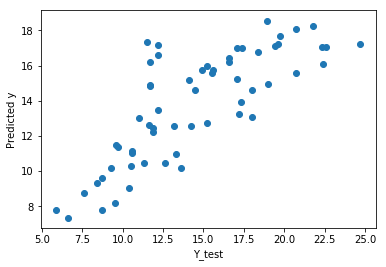

In [37]:
plt.scatter(Y_test,y_pred)
plt.xlabel('Y_test')
plt.ylabel('Predicted y')

#  X---------X---- This conludes the first case study ----X----------X 